# **Inference YOLOv11 segmentation**

https://docs.ultralytics.com/modes/predict/#why-use-ultralytics-yolo-for-inference

In [26]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

#image_path = r"C:\CorneAI\DemoImage\典型例\【正常】demo008.BMP"
#image_path = r"C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_1.jpg"
image_path = r"C:\Users\CorneAI\YOLOv11_Mobius\Segmentation_test_images\内斜視\5409-20030521-1-083545_9f2969d8ae990d14e09de27a0378a196f684c66f54658d24944400ec365229d1.JPG"
#image_path = r"C:\Users\CorneAI\YOLOv11_Mobius\Segmentation_test_images\先天性眼瞼下垂\93-20170215-3-134156_1aa2bdb042b6ecd2749d0f93d0831ead1e35e5267d50ae4d8d5c382816377408.jpg"

model = YOLO(r"C:\Users\CorneAI\YOLOv11_Mobius\instanceenv\runs\segment\train7\weights\best.pt")  # load a pretrained model (recommended for training)
#model = YOLO(r"C:\Users\CorneAI\YOLOv11_Mobius\models\best_n_458epochs.pt")  # load a pretrained model (recommended for training)

results = model(image_path,save=False)

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk


image 1/1 C:\Users\CorneAI\YOLOv11_Mobius\Segmentation_test_images\\5409-20030521-1-083545_9f2969d8ae990d14e09de27a0378a196f684c66f54658d24944400ec365229d1.JPG: 448x640 1 pupil, 2 iriss, 2 eyelids, 24.2ms
Speed: 6.4ms preprocess, 24.2ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


In [35]:
image_path = r"C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_1.jpg"
model = YOLO(r"C:\Users\CorneAI\YOLOv11_Mobius\instanceenv\runs\segment\train7\weights\best.pt")  # load a pretrained model (recommended for training)
resuls = model.predict(source=image_path, save= True, augment=True, classes=[2], save_txt=True)


WARNING  Model does not support 'augment=True', reverting to single-scale prediction.
image 1/1 C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_1.jpg: 352x640 1 eyelid, 30.8ms
Speed: 15.7ms preprocess, 30.8ms inference, 2.8ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs\segment\predict9
1 label saved to runs\segment\predict9\labels


In [4]:
from ultralytics import YOLO

# モデルとイメージの読み込み
image_path = r"C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_2.jpg"
model = YOLO(r"C:\Users\CorneAI\YOLOv11_Mobius\models\best_458epochs.pt")
results = model(image_path, save=False)

# 各検出結果に対してセグメントの座標を表示
for result in results:
    # マスクが存在する場合
    if result.masks is not None:
        masks = result.masks  # Masks objectを取得
        
        # xy座標を取得（ピクセル座標）
        segments = masks.xy  # リストのリストとして座標を取得
        
        # 各セグメントに対して処理
        for i, segment in enumerate(segments):
            print(f"Segment {i + 1}:")
            print("Coordinates (x, y):")
            # 座標点を表示
            for point in segment:
                print(f"({point[0]:.1f}, {point[1]:.1f})")
            print("-" * 50)


image 1/1 C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_2.jpg: 256x640 3 eyelids, 2 iriss, 2 pupils, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 640)
Segment 1:
Coordinates (x, y):
(189.8, 242.4)
(189.8, 247.2)
(181.8, 255.1)
(180.3, 255.1)
(178.7, 256.7)
(173.9, 256.7)
(173.9, 308.9)
(178.7, 308.9)
(181.8, 312.0)
(181.8, 313.6)
(185.0, 316.8)
(185.0, 318.3)
(197.7, 331.0)
(199.2, 331.0)
(200.8, 332.6)
(202.4, 332.6)
(204.0, 334.1)
(205.6, 334.1)
(207.1, 335.7)
(210.3, 335.7)
(211.9, 337.3)
(215.1, 337.3)
(216.6, 338.9)
(223.0, 338.9)
(224.5, 340.5)
(235.6, 340.5)
(237.2, 338.9)
(243.5, 338.9)
(245.1, 337.3)
(246.7, 337.3)
(248.3, 335.7)
(249.8, 335.7)
(251.4, 334.1)
(253.0, 334.1)
(254.6, 332.6)
(256.2, 332.6)
(260.9, 327.8)
(262.5, 327.8)
(265.6, 324.7)
(265.6, 323.1)
(272.0, 316.8)
(272.0, 315.2)
(275.1, 312.0)
(275.1, 310.4)
(278.3, 307.3)
(278.3, 304.1)
(281.5, 300.9)
(286.2, 300.9)
(286.2, 270.9)
(281.5, 270.9)
(278.3, 267.

In [3]:

from ultralytics import YOLO
import cv2
import os
from pathlib import Path
import numpy as np
from tqdm import tqdm

def process_images(input_path, output_dir, model_path):
    # モデルの読み込み
    model = YOLO(model_path)
    
    # 出力ディレクトリの作成
    os.makedirs(output_dir, exist_ok=True)
    
    # 入力パスの処理
    input_path = Path(input_path)
    if input_path.is_file():  # 単一ファイルの場合
        files = [input_path]
    else:  # ディレクトリの場合
        # 対応する画像形式をリストアップ
        files = []
        for ext in ['.jpg', '.jpeg', '.png', '.bmp']:
            files.extend(list(input_path.glob(f'*{ext}')))
            files.extend(list(input_path.glob(f'*{ext.upper()}')))  # 大文字拡張子にも対応
    
    # ファイルが見つからない場合の処理
    if not files:
        print("No image files found!")
        return
    
    print(f"Found {len(files)} images to process")
    
    # 進捗バーを表示しながら処理
    for img_path in tqdm(files, desc="Processing images"):
        try:
            # 画像の読み込み
            original_img = cv2.imread(str(img_path))
            if original_img is None:
                print(f"\nFailed to load image: {img_path}")
                continue
                
            # 推論の実行
            results = model(original_img)
            
            # マスクの描画された画像を取得
            predicted_img = results[0].plot()
            
            # 画像のサイズを揃える
            h1, w1 = original_img.shape[:2]
            h2, w2 = predicted_img.shape[:2]
            
            # 大きい方のサイズに合わせる
            max_h = max(h1, h2)
            max_w = max(w1, w2)
            
            # パディング
            padded_original = np.zeros((max_h, max_w, 3), dtype=np.uint8)
            padded_predicted = np.zeros((max_h, max_w, 3), dtype=np.uint8)
            
            # 元画像をパディングした画像に配置
            padded_original[:h1, :w1] = original_img
            padded_predicted[:h2, :w2] = predicted_img
            
            # 画像を横に連結
            combined_img = np.hstack((padded_original, padded_predicted))
            
            # 保存するファイル名（元のファイル名を使用）
            output_path = Path(output_dir) / img_path.name
            
            # 画像の保存（PNG形式で保存してクオリティを維持）
            cv2.imwrite(str(output_path), combined_img, [cv2.IMWRITE_PNG_COMPRESSION, 0])
            
        except Exception as e:
            print(f"\nError processing {img_path}: {str(e)}")
            continue

# パラメータの設定
model_path = r"C:\Users\CorneAI\YOLOv11_Mobius\models\best_458epochs.pt"
output_dir = r"C:\Users\CorneAI\YOLOv11_Mobius\inferences"

# 使用例：
# 単一ファイルの場合
#input_path = r"C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_1.jpg"
# あるいはディレクトリの場合
input_path = r"C:\Users\CorneAI\YOLOv11_Mobius\samples"

if __name__ == "__main__":
    process_images(input_path, output_dir, model_path)

Found 10 images to process


Processing images:   0%|          | 0/10 [00:00<?, ?it/s]


0: 352x640 1 eyelid, 1 iris, 1 pupil, 45.5ms
Speed: 3.0ms preprocess, 45.5ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


Processing images:  10%|█         | 1/10 [00:00<00:02,  4.29it/s]


0: 256x640 3 eyelids, 2 iriss, 2 pupils, 12.9ms
Speed: 2.0ms preprocess, 12.9ms inference, 4.8ms postprocess per image at shape (1, 3, 256, 640)

0: 448x640 1 eyelid, 1 iris, 1 pupil, 45.7ms
Speed: 2.0ms preprocess, 45.7ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing images:  30%|███       | 3/10 [00:00<00:00,  9.37it/s]


0: 448x640 1 eyelid, 1 iris, 1 pupil, 19.8ms
Speed: 2.8ms preprocess, 19.8ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)

0: 576x640 1 eyelid, 1 iris, 1 pupil, 41.9ms
Speed: 6.2ms preprocess, 41.9ms inference, 6.2ms postprocess per image at shape (1, 3, 576, 640)


Processing images:  50%|█████     | 5/10 [00:00<00:00, 12.20it/s]


0: 352x640 1 eyelid, 1 iris, 1 pupil, 14.3ms
Speed: 3.7ms preprocess, 14.3ms inference, 3.1ms postprocess per image at shape (1, 3, 352, 640)

0: 256x640 3 eyelids, 2 iriss, 2 pupils, 8.9ms
Speed: 5.0ms preprocess, 8.9ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 640)


Processing images:  70%|███████   | 7/10 [00:00<00:00, 14.54it/s]


0: 448x640 1 eyelid, 1 iris, 1 pupil, 19.1ms
Speed: 1.8ms preprocess, 19.1ms inference, 3.5ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 eyelid, 1 iris, 1 pupil, 16.6ms
Speed: 0.0ms preprocess, 16.6ms inference, 5.5ms postprocess per image at shape (1, 3, 448, 640)

0: 576x640 1 eyelid, 1 iris, 1 pupil, 22.5ms
Speed: 2.4ms preprocess, 22.5ms inference, 5.4ms postprocess per image at shape (1, 3, 576, 640)


Processing images: 100%|██████████| 10/10 [00:00<00:00, 13.80it/s]



0: 256x640 3 eyelids, 2 iriss, 2 pupils, 12.6ms
Speed: 5.9ms preprocess, 12.6ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 640)


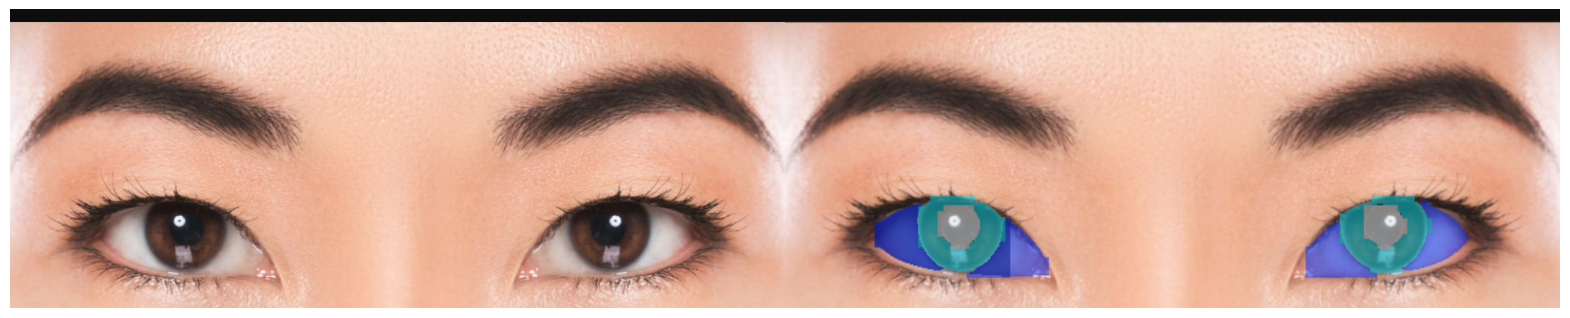

In [28]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_single_image(image_path, model_path):
    # モデルの読み込み
    model = YOLO(model_path)
    
    # 画像の読み込み
    original_img = cv2.imread(image_path)
    if original_img is None:
        print(f"Failed to load image: {image_path}")
        return
        
    # 推論の実行
    results = model(original_img)
    
    # マスクの描画された画像を取得（ラベルなし）
    predicted_img = results[0].plot(labels=False, boxes=False)
    
    # 画像のサイズを揃える
    h1, w1 = original_img.shape[:2]
    h2, w2 = predicted_img.shape[:2]
    
    # 大きい方のサイズに合わせる
    max_h = max(h1, h2)
    max_w = max(w1, w2)
    
    # パディング
    padded_original = np.zeros((max_h, max_w, 3), dtype=np.uint8)
    padded_predicted = np.zeros((max_h, max_w, 3), dtype=np.uint8)
    
    # 元画像をパディングした画像に配置
    padded_original[:h1, :w1] = original_img
    padded_predicted[:h2, :w2] = predicted_img
    
    # 画像を横に連結
    combined_img = np.hstack((padded_original, padded_predicted))
    
    # Matplotlib で表示
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# パラメータの設定
model_path = r"C:\Users\CorneAI\YOLOv11_Mobius\models\best_458epochs.pt"
image_path = r"C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_2.jpg"

# 実行
display_single_image(image_path, model_path)





0: 256x640 3 eyelids, 2 iriss, 2 pupils, 14.1ms
Speed: 5.1ms preprocess, 14.1ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 640)


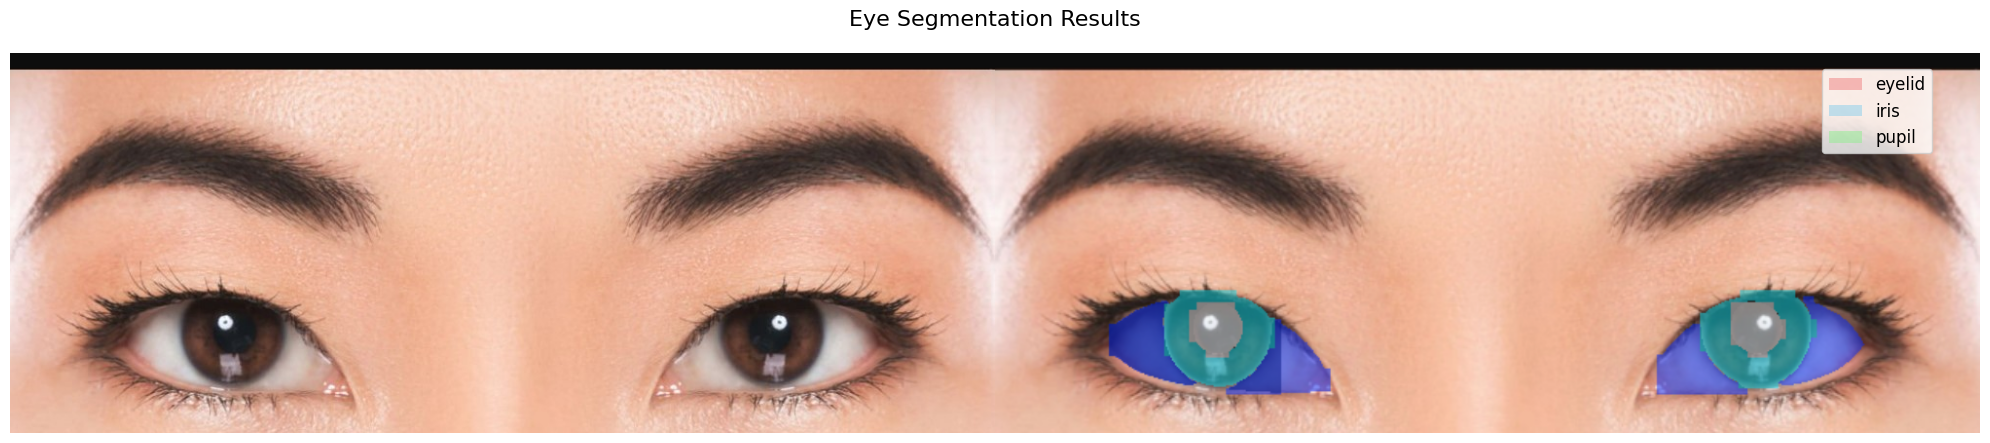

In [34]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_single_image(image_path, model_path):
    # モデルの読み込み
    model = YOLO(model_path)
    
    # 画像の読み込み
    original_img = cv2.imread(image_path)
    if original_img is None:
        print(f"Failed to load image: {image_path}")
        return
        
    # 推論の実行
    results = model(original_img)
    
    # カスタムカラーの定義（RGB形式）
    colors = {
        'eyelid': (240, 128, 128),  # ライトコーラル
        'iris': (135, 206, 235),    # スカイブルー
        'pupil': (144, 238, 144)    # ライトグリーン
    }
    
    # マスクの描画（カスタムカラー）
    predicted_img = results[0].plot(
        labels=False, 
        boxes=False,
        conf=False,
        line_width=2,
        font_size=14,
        masks=True
    )
    
    # 画像のサイズを揃える
    h1, w1 = original_img.shape[:2]
    h2, w2 = predicted_img.shape[:2]
    
    max_h = max(h1, h2)
    max_w = max(w1, w2)
    
    # パディング
    padded_original = np.zeros((max_h, max_w, 3), dtype=np.uint8)
    padded_predicted = np.zeros((max_h, max_w, 3), dtype=np.uint8)
    
    padded_original[:h1, :w1] = original_img
    padded_predicted[:h2, :w2] = predicted_img
    
    # 画像を横に連結
    combined_img = np.hstack((padded_original, padded_predicted))
    
    # Matplotlibで表示
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
    
    # 凡例を追加（カスタムカラーに合わせて変更）
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, fc='lightcoral', alpha=0.5, label='eyelid'),
        plt.Rectangle((0, 0), 1, 1, fc='skyblue', alpha=0.5, label='iris'),
        plt.Rectangle((0, 0), 1, 1, fc='lightgreen', alpha=0.5, label='pupil')
    ]
    
    plt.legend(
        handles=legend_elements, 
        loc='upper right', 
        bbox_to_anchor=(0.98, 0.98),
        fontsize=12,
        framealpha=0.8
    )
    
    plt.title('Eye Segmentation Results', fontsize=16, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# パラメータの設定
model_path = r"C:\Users\CorneAI\YOLOv11_Mobius\models\best_458epochs.pt"
image_path = r"C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_2.jpg"

# 実行
display_single_image(image_path, model_path)


0: 256x640 3 eyelids, 2 iriss, 2 pupils, 14.1ms
Speed: 3.7ms preprocess, 14.1ms inference, 4.1ms postprocess per image at shape (1, 3, 256, 640)


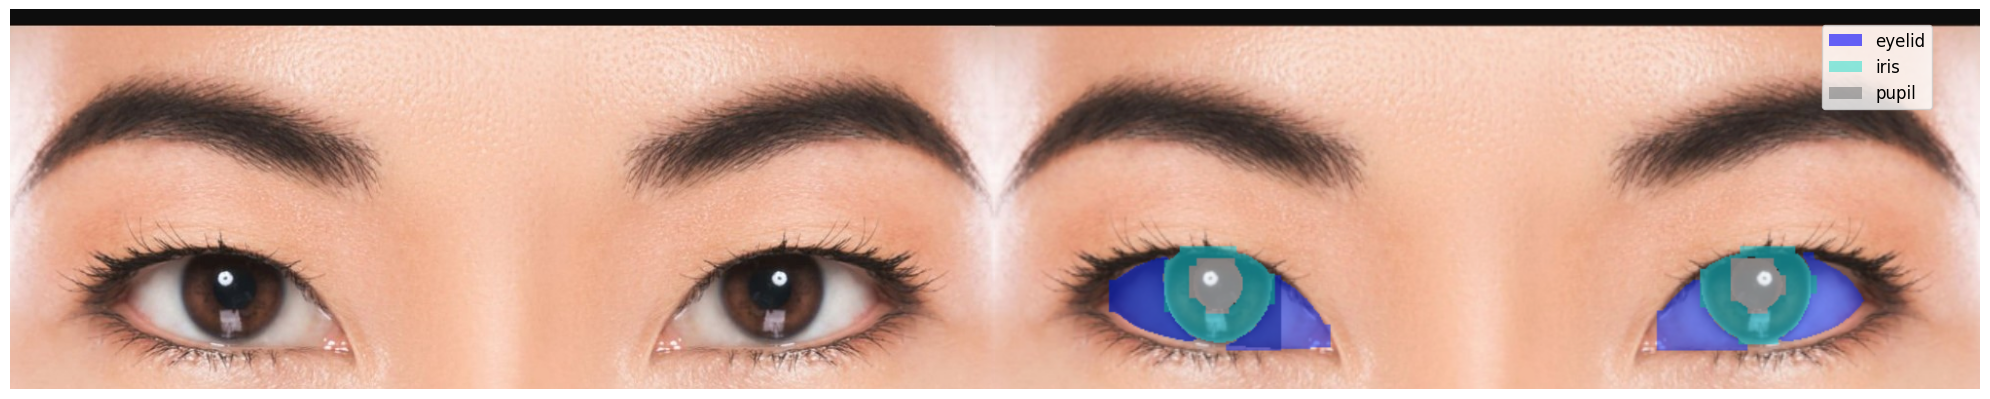

In [36]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_single_image(image_path, model_path):
    # モデルの読み込み
    model = YOLO(model_path)
    
    # 画像の読み込み
    original_img = cv2.imread(image_path)
    if original_img is None:
        print(f"Failed to load image: {image_path}")
        return
        
    # 推論の実行
    results = model(original_img)
    
    # マスクの描画（ラベルなし）
    predicted_img = results[0].plot(labels=False, boxes=False)
    
    # 画像のサイズを揃える
    h1, w1 = original_img.shape[:2]
    h2, w2 = predicted_img.shape[:2]
    
    max_h = max(h1, h2)
    max_w = max(w1, w2)
    
    # パディング
    padded_original = np.zeros((max_h, max_w, 3), dtype=np.uint8)
    padded_predicted = np.zeros((max_h, max_w, 3), dtype=np.uint8)
    
    padded_original[:h1, :w1] = original_img
    padded_predicted[:h2, :w2] = predicted_img
    
    # 画像を横に連結
    combined_img = np.hstack((padded_original, padded_predicted))
    
    # Matplotlibで表示
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
    
    # 凡例を追加（画像と同じ色を使用）
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, fc=(0/255, 0/255, 255/255), alpha=0.6, label='eyelid'),     # 青
        plt.Rectangle((0, 0), 1, 1, fc=(64/255, 224/255, 208/255), alpha=0.6, label='iris'),    # ターコイズ
        plt.Rectangle((0, 0), 1, 1, fc=(128/255, 128/255, 128/255), alpha=0.6, label='pupil')   # グレー
    ]
    
    plt.legend(
        handles=legend_elements, 
        loc='upper right', 
        bbox_to_anchor=(0.98, 0.98),
        fontsize=12,
        framealpha=0.8
    )
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# パラメータの設定
model_path = r"C:\Users\CorneAI\YOLOv11_Mobius\models\best_458epochs.pt"
image_path = r"C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_2.jpg"

# 実行
display_single_image(image_path, model_path)


0: 576x640 1 eyelid, 1 iris, 1 pupil, 30.5ms
Speed: 1.2ms preprocess, 30.5ms inference, 0.0ms postprocess per image at shape (1, 3, 576, 640)


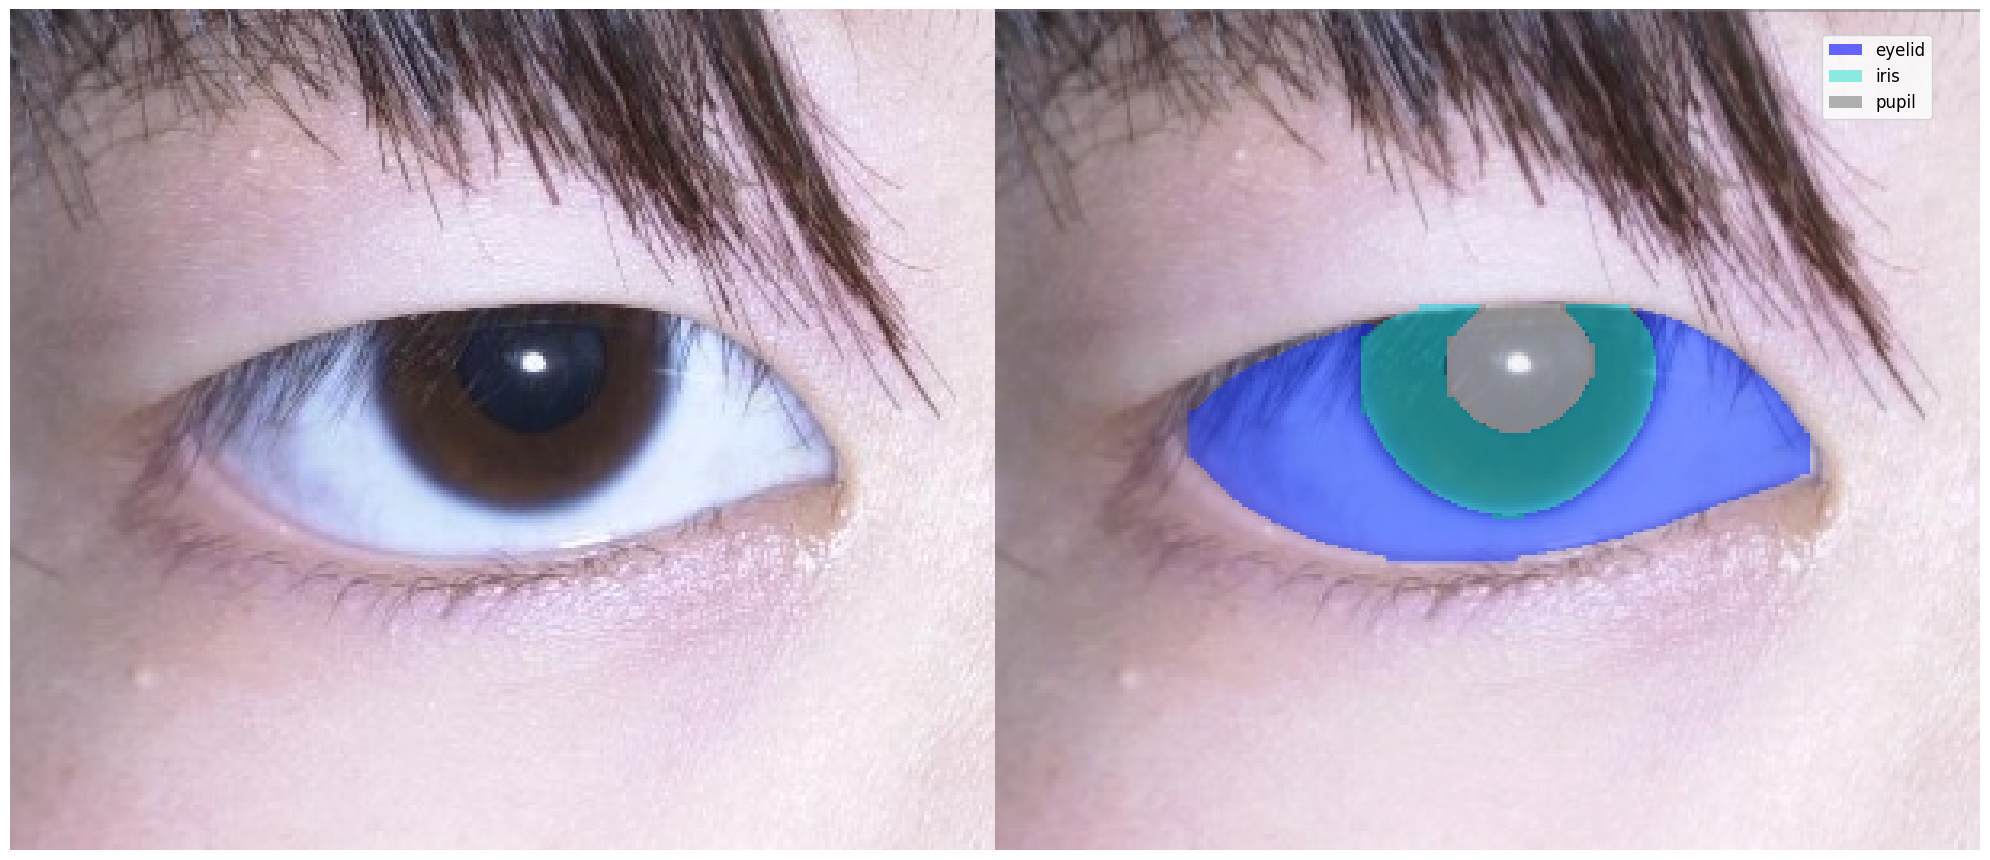


0: 640x640 2 eyelids, 1 iris, 1 pupil, 24.7ms
Speed: 4.6ms preprocess, 24.7ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)


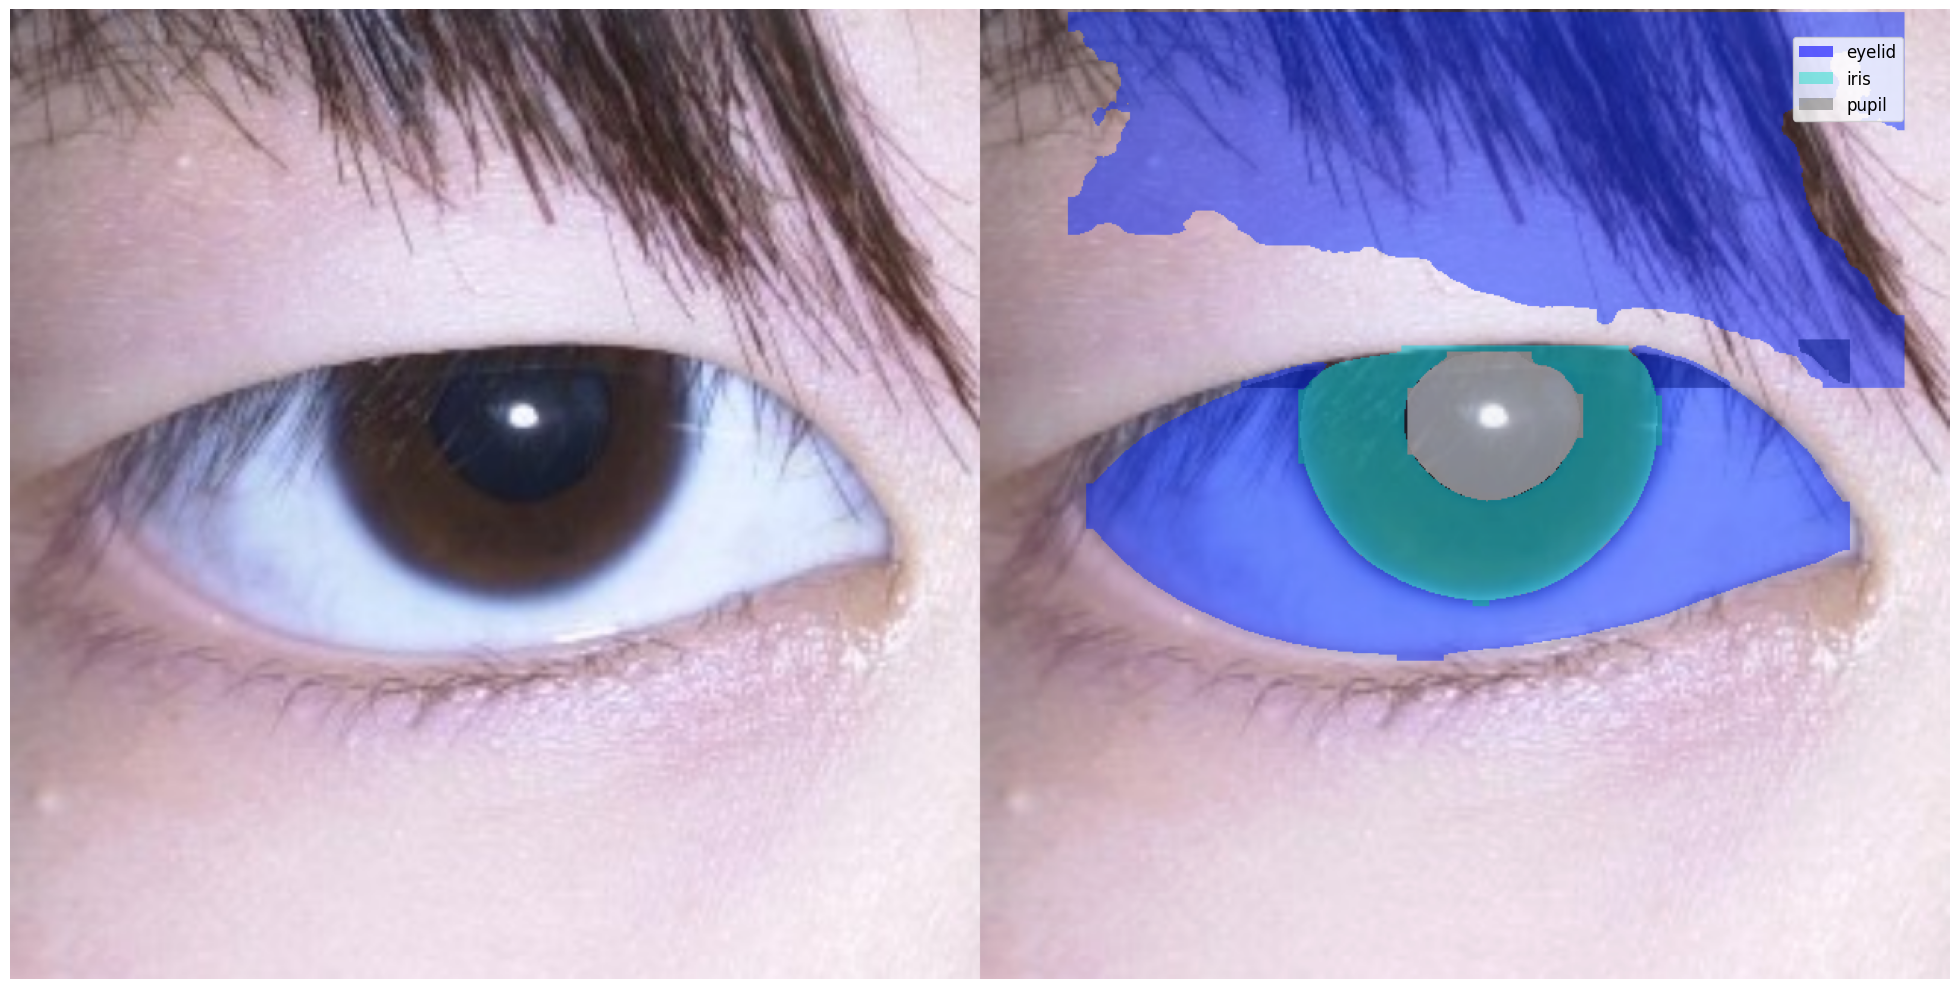

In [49]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# inference -->　eyelidに15%ずつpaddingして正方形に切り抜き --> 再度inference

def display_single_image(image_path, model_path):
    # モデルの読み込み
    model = YOLO(model_path)
    
    # 画像の読み込み
    original_img = cv2.imread(image_path)
    if original_img is None:
        print(f"画像の読み込みに失敗しました: {image_path}")
        return
        
    # 推論の実行
    results = model(original_img)
    
    # マスクの描画（ラベルなし）
    predicted_img = results[0].plot(labels=False, boxes=False)
    
    # 画像のサイズを揃える
    h1, w1 = original_img.shape[:2]
    h2, w2 = predicted_img.shape[:2]
    
    max_h = max(h1, h2)
    max_w = max(w1, w2)
    
    # パディング
    padded_original = np.zeros((max_h, max_w, 3), dtype=np.uint8)
    padded_predicted = np.zeros((max_h, max_w, 3), dtype=np.uint8)
    
    padded_original[:h1, :w1] = original_img
    padded_predicted[:h2, :w2] = predicted_img
    
    # 画像を横に連結
    combined_img = np.hstack((padded_original, padded_predicted))
    
    # Matplotlibで表示
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(combined_img, cv2.COLOR_BGR2RGB))
    
    # 凡例を追加（画像と同じ色を使用）
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, fc=(0/255, 0/255, 255/255), alpha=0.6, label='eyelid'),     # 青
        plt.Rectangle((0, 0), 1, 1, fc=(64/255, 224/255, 208/255), alpha=0.6, label='iris'),    # ターコイズ
        plt.Rectangle((0, 0), 1, 1, fc=(128/255, 128/255, 128/255), alpha=0.6, label='pupil')   # グレー
    ]
    
    plt.legend(
        handles=legend_elements, 
        loc='upper right', 
        bbox_to_anchor=(0.98, 0.98),
        fontsize=12,
        framealpha=0.8
    )
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # eyelid の検出領域にパディングを加え、クロップ・リサイズした後、再度推論
    for result in results:
        for detection in result.boxes.data:
            class_id = int(detection[5])  # クラスID
            if class_id == 0:  # クラスID 0がeyelidの場合と仮定
                # バウンディングボックス座標 (x1, y1, x2, y2)
                bbox = detection[:4].cpu().numpy().astype(int)
                
                # クロップとリサイズ
                cropped_resized_img = crop_and_resize(original_img, bbox, padding_ratio=0.15, size=640)
                
                # 再度推論
                results_resized = model(cropped_resized_img)
                resized_predicted_img = results_resized[0].plot(labels=False, boxes=False)
                
                # 画像のサイズを揃える（切り抜き後の画像と再推論画像）
                h_orig, w_orig = cropped_resized_img.shape[:2]
                h_resized, w_resized = resized_predicted_img.shape[:2]
                
                max_h_new = max(h_orig, h_resized)
                max_w_new = max(w_orig, w_resized)
                
                # パディング
                padded_cropped = np.zeros((max_h_new, max_w_new, 3), dtype=np.uint8)
                padded_resized = np.zeros((max_h_new, max_w_new, 3), dtype=np.uint8)
                
                padded_cropped[:h_orig, :w_orig] = cropped_resized_img
                padded_resized[:h_resized, :w_resized] = resized_predicted_img
                
                # 画像を横に連結
                combined_new_img = np.hstack((padded_cropped, padded_resized))
                
                # Matplotlibで表示
                plt.figure(figsize=(20, 10))
                plt.imshow(cv2.cvtColor(combined_new_img, cv2.COLOR_BGR2RGB))
                
                # 凡例を追加（最初の画像と同じ色を使用）
                legend_elements_new = [
                    plt.Rectangle((0, 0), 1, 1, fc=(0/255, 0/255, 255/255), alpha=0.6, label='eyelid'),     # 青
                    plt.Rectangle((0, 0), 1, 1, fc=(64/255, 224/255, 208/255), alpha=0.6, label='iris'),    # ターコイズ
                    plt.Rectangle((0, 0), 1, 1, fc=(128/255, 128/255, 128/255), alpha=0.6, label='pupil')   # グレー
                ]
                
                plt.legend(
                    handles=legend_elements_new, 
                    loc='upper right', 
                    bbox_to_anchor=(0.98, 0.98),
                    fontsize=12,
                    framealpha=0.8
                )
                
                plt.axis('off')
                plt.tight_layout()
                plt.show()

def crop_and_resize(image, bbox, padding_ratio=0.15, size=640):
    """
    検出領域に横15%のパディングを追加し、正方形にクロップした後リサイズします。
    
    Parameters:
    - image: 元の画像 (numpy array)
    - bbox: バウンディングボックス座標 [x1, y1, x2, y2]
    - padding_ratio: パディングの割合 (デフォルトは0.15)
    - size: リサイズ後のサイズ (デフォルトは640)
    
    Returns:
    - resized_img: リサイズされたクロップ画像
    """
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    
    # 横方向の15%パディング
    pad_x = int(width * padding_ratio)
    pad_y = int(height * padding_ratio)
    
    # パディングを追加した領域の計算
    x1_padded = max(0, x1 - pad_x)
    y1_padded = max(0, y1 - pad_y)
    x2_padded = min(image.shape[1], x2 + pad_x)
    y2_padded = min(image.shape[0], y2 + pad_y)
    
    # パディング後のサイズ
    padded_width = x2_padded - x1_padded
    padded_height = y2_padded - y1_padded
    
    # 正方形にするためのサイズ調整
    square_size = max(padded_width, padded_height)
    
    # 正方形の左上座標を計算
    square_x1 = x1_padded - (square_size - padded_width) // 2
    square_y1 = y1_padded - (square_size - padded_height) // 2
    square_x2 = square_x1 + square_size
    square_y2 = square_y1 + square_size
    
    # 画像範囲内に収める
    square_x1 = max(0, square_x1)
    square_y1 = max(0, square_y1)
    square_x2 = min(image.shape[1], square_x2)
    square_y2 = min(image.shape[0], square_y2)
    
    # クロップ
    cropped_img = image[square_y1:square_y2, square_x1:square_x2]
    
    # リサイズ
    resized_img = cv2.resize(cropped_img, (size, size))
    return resized_img

if __name__ == "__main__":
    # パラメータの設定
    model_path = r"C:\Users\CorneAI\YOLOv11_Mobius\models\best_458epochs.pt"
    image_path = r"C:\Users\CorneAI\YOLOv11_Mobius\samples\sample_5.jpg"
    
    # 実行
    display_single_image(image_path, model_path)


